In [1]:
from google.colab import files
uploaded=files.upload()
print(uploaded)


Saving loan_prediction.csv to loan_prediction.csv
{'loan_prediction.csv': b'Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status\nLP001002,Male,No,0,Graduate,No,5849,0,,360,1,Urban,Y\nLP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N\nLP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y\nLP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y\nLP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y\nLP001011,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y\nLP001013,Male,Yes,0,Not Graduate,No,2333,1516,95,360,1,Urban,Y\nLP001014,Male,Yes,3+,Graduate,No,3036,2504,158,360,0,Semiurban,N\nLP001018,Male,Yes,2,Graduate,No,4006,1526,168,360,1,Urban,Y\nLP001020,Male,Yes,1,Graduate,No,12841,10968,349,360,1,Semiurban,N\nLP001024,Male,Yes,2,Graduate,No,3200,700,70,360,1,Urban,Y\nLP001027,Male,Yes,2,Graduate,,2500,1840,109,360,1,Urban,Y\nLP001028,Male,Yes,2,Graduate,

In [14]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('loan_prediction.csv')

In [4]:
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
    df[col].fillna(df[col].mode()[0], inplace=True)


<ipython-input-4-8aa3afa531dd>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [6]:
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
    df[col] = df[col].fillna(df[col].mode()[0])


In [7]:
df['Income_Category'] = pd.cut(df['ApplicantIncome'], bins=[0, 2500, 4000, 6000, 81000],
                               labels=['Low', 'Average', 'High', 'Very High'])
df['LoanAmount_Category'] = pd.cut(df['LoanAmount'], bins=[0, 100, 200, 700],
                                   labels=['Low', 'Average', 'High'])


In [8]:
columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
           'Income_Category', 'LoanAmount_Category', 'Loan_Status', 'Property_Area']
df_filtered = df[columns].astype(str)

In [9]:
records = df_filtered.values.tolist()

In [10]:
te = TransactionEncoder()
df_encoded = te.fit(records).transform(records)
df_transactions = pd.DataFrame(df_encoded, columns=te.columns_)

In [11]:
frequent_itemsets = apriori(df_transactions, min_support=0.1, use_colnames=True)

In [12]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

In [13]:
print("✅ Frequent Itemsets:")
print(frequent_itemsets)

print("\n✅ Association Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

✅ Frequent Itemsets:
      support                                  itemsets
0    0.586319                                       (0)
1    0.166124                                       (1)
2    0.164495                                       (2)
3    0.750814                                 (Average)
4    0.182410                                  (Female)
..        ...                                       ...
652  0.112378    (Yes, Semiurban, Y, Average, No, Male)
653  0.114007        (Yes, Y, Graduate, No, Male, High)
654  0.123779   (Yes, Semiurban, Y, Graduate, No, Male)
655  0.112378       (Yes, Y, Graduate, No, Male, Urban)
656  0.125407  (Yes, 0, Y, Average, Graduate, No, Male)

[657 rows x 2 columns]

✅ Association Rules:
     antecedents                            consequents   support  confidence  \
0            (0)                              (Average)  0.446254    0.761111   
1      (Average)                                    (0)  0.446254    0.594360   
2       (Female)  

<ipython-input-15-ebae3f24a2e8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='support', y=top_itemsets['itemsets'].astype(str), data=top_itemsets, palette='Blues_d')


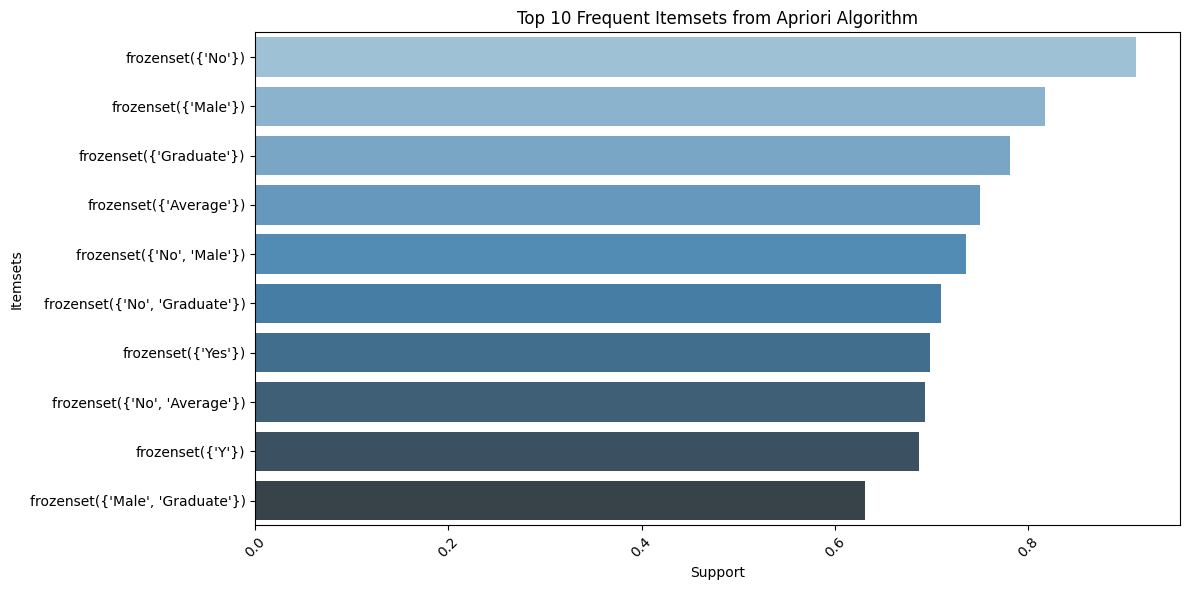

In [15]:
top_itemsets = frequent_itemsets.sort_values(by='support', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='support', y=top_itemsets['itemsets'].astype(str), data=top_itemsets, palette='Blues_d')
plt.title('Top 10 Frequent Itemsets from Apriori Algorithm')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()